<a href="https://colab.research.google.com/github/samula98/proj4_0/blob/main/20241031_proj4_v00_Spotify_Description_for_Students.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction


This project will take data features collected for songs that have been on the Top 200 Weekly (Global) charts of Spotify in 2020 & 2021. The popularity of the song will be predicted using a tree-based regression model trained on these features.



*Goals:*

*determine the importance of the factors that predict how popular a song will be*

**&**

*minimize the RMSE*


The goals for the project are:

- Minimize the cross-validated ***root mean squared error ( RMSE )*** when predicting the popularity of a new song.

- Determine the importance of the features in driving the regression result.
The project will be done using tree-based regression techniques as covered in class. The parameters of the trees should be carefully selected to avoid over-fitting.


There are three main challenges for this project:

1. Determining the outcome ( i.e. target ).  There is a "popularity" column.  But other columns may or may not be more appropriate indicators of popularity.

1. Choosing appropriate predictors ( i.e. features ). When building a machine learning model, we want to make sure that we consider how the model will be ultimately used. For this project, we are predicting the popularity of a new song. Therefore, we should only include the predictors we would have for a new song.

1. Data cleaning and feature engineering. Some creative cleaning and/or feature engineering may be needed to extract useful information for prediction.



Once again, be sure to go through the whole data science process and document as such in your Jupyter notebook.

The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: zg7dv2Kuj18v8kw0emwGZ2D07N98bky8GAbAdBU2yLP8Tkyhzyz2KCTg01tTvFqRvfR2EHtWzDc=
x-amz-request-id: 0VQXW9HHS2YTZ7N1
Date: Tue, 05 Nov 2024 07:19:10 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Server: AmazonS3
Content-Length: 738124



In [ ]:
df = pd.read_csv(url)
df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
df.tail()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F
1555,1556,199,1,2019-12-27--2020-01-03,Lover (Remix) [feat. Shawn Mendes],"4,595,450",Taylor Swift,42227614,3i9UVldZOE0aD0JnyfAZZ0,"['pop', 'post-teen pop']",...,0.448,0.603,-7.176,0.064,0.433,0.0862,205.272,221307,0.422,G


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
spot = df.copy()
spot

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
spot.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,1556.0,778.500000,449.322824,1.0,389.75,778.5,1167.25,1556.0
Highest Charting Position,1556.0,87.744216,58.147225,1.0,37.00,80.0,137.00,200.0
Number of Times Charted,1556.0,10.668380,16.360546,1.0,1.00,4.0,12.00,142.0


In [ ]:
# dropping: Artist Followers, Song ID, Streams, Weeks Charted, Artist, Highest Charting Position, Number of Times Charted
spot.drop('Artist Followers', axis = 1, inplace = True)
spot.drop('Song ID', axis = 1, inplace = True)
spot.drop('Streams', axis = 1, inplace = True)
spot.drop('Weeks Charted', axis = 1, inplace = True)
spot.drop('Artist', axis = 1, inplace = True)
spot.drop('Highest Charting Position', axis = 1, inplace = True)
spot.drop('Number of Times Charted', axis = 1, inplace = True)

spot

,Index,Week of Highest Charting,Song Name,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,2021-07-23--2021-07-30,Beggin',"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2021-07-23--2021-07-30,STAY (with Justin Bieber),['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,2021-06-25--2021-07-02,good 4 u,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,2021-07-02--2021-07-09,Bad Habits,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2019-12-27--2020-01-03,New Rules,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,2019-12-27--2020-01-03,Havana (feat. Young Thug),"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# double checking columns were dropped
spot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     1556 non-null   int64 
 1   Week of Highest Charting  1556 non-null   object
 2   Song Name                 1556 non-null   object
 3   Genre                     1556 non-null   object
 4   Release Date              1556 non-null   object
 5   Popularity                1556 non-null   object
 6   Danceability              1556 non-null   object
 7   Energy                    1556 non-null   object
 8   Loudness                  1556 non-null   object
 9   Speechiness               1556 non-null   object
 10  Acousticness              1556 non-null   object
 11  Liveness                  1556 non-null   object
 12  Tempo                     1556 non-null   object
 13  Duration (ms)             1556 non-null   object
 14  Valence                 

In [ ]:
# assigning obj in df to new df called cat_columns
cat_columns = spot.select_dtypes(include = ['object'])
cat_columns

,Week of Highest Charting,Song Name,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,2021-07-23--2021-07-30,Beggin',"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2021-07-23--2021-07-30,STAY (with Justin Bieber),['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,2021-06-25--2021-07-02,good 4 u,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,2021-07-02--2021-07-09,Bad Habits,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,2019-12-27--2020-01-03,New Rules,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,2019-12-27--2020-01-03,Havana (feat. Young Thug),"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# making sure length of cat_columns df is still length of original df
num_cat_columns = len(cat_columns)
num_cat_columns

1556

In [ ]:
# seeing how many categories are in each column of df
for col in cat_columns:
  num_cats = spot[col].nunique()
  print(f'{col}: {num_cats} categories')

Week of Highest Charting: 83 categories
Song Name: 1556 categories
Genre: 395 categories
Release Date: 478 categories
Popularity: 70 categories
Danceability: 530 categories
Energy: 575 categories
Loudness: 1394 categories
Speechiness: 772 categories
Acousticness: 965 categories
Liveness: 606 categories
Tempo: 1461 categories
Duration (ms): 1486 categories
Valence: 732 categories
Chord: 13 categories


In [ ]:
spot_clean = spot.copy()
spot_clean

,Index,Week of Highest Charting,Song Name,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,2021-07-23--2021-07-30,Beggin',"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2021-07-23--2021-07-30,STAY (with Justin Bieber),['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,2021-06-25--2021-07-02,good 4 u,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,2021-07-02--2021-07-09,Bad Habits,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2019-12-27--2020-01-03,New Rules,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,2019-12-27--2020-01-03,Havana (feat. Young Thug),"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# spot_clean['Streams'] = pd.to_numeric(spot['Streams']).astype('Int64')
# fixing the dates to more readable format?
# format in question: 2019-12-27--2020-01-03
spot_clean['Week of Highest Charting'] = spot_clean['Week of Highest Charting'].str.replace('--', ' ', regex = False)
spot_clean

,Index,Week of Highest Charting,Song Name,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,2021-07-23 2021-07-30,Beggin',"['indie rock italiano', 'italian pop']",2017-12-08,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2021-07-23 2021-07-30,STAY (with Justin Bieber),['australian hip hop'],2021-07-09,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,2021-06-25 2021-07-02,good 4 u,['pop'],2021-05-21,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,2021-07-02 2021-07-09,Bad Habits,"['pop', 'uk pop']",2021-06-25,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,2021-07-23 2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,2019-12-27 2020-01-03,New Rules,"['dance pop', 'pop', 'uk pop']",2017-06-02,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,2019-12-27 2020-01-03,Cheirosa - Ao Vivo,"['sertanejo', 'sertanejo universitario']",2019-10-11,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,2019-12-27 2020-01-03,Havana (feat. Young Thug),"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,2019-12-27 2020-01-03,Surtada - Remix Brega Funk,"['brega funk', 'funk carioca']",2019-09-25,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
spot_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     1556 non-null   int64 
 1   Week of Highest Charting  1556 non-null   object
 2   Song Name                 1556 non-null   object
 3   Genre                     1556 non-null   object
 4   Release Date              1556 non-null   object
 5   Popularity                1556 non-null   object
 6   Danceability              1556 non-null   object
 7   Energy                    1556 non-null   object
 8   Loudness                  1556 non-null   object
 9   Speechiness               1556 non-null   object
 10  Acousticness              1556 non-null   object
 11  Liveness                  1556 non-null   object
 12  Tempo                     1556 non-null   object
 13  Duration (ms)             1556 non-null   object
 14  Valence                 

In [ ]:
spot_clean['Release Date']

,Release Date
0,2017-12-08
1,2021-07-09
2,2021-05-21
3,2021-06-25
4,2021-07-23
...,...
1551,2017-06-02
1552,2019-10-11
1553,2018-01-12
1554,2019-09-25


In [ ]:
# spot_clean['Week of Highest Charting'] = spot_clean['Week of Highest Charting'].str.replace('--', ' ', regex = False)


# spot_clean['Release Date'] = pd.to_datetime(spot_clean['Release Date'], format = 'mixed')
# spot_clean['Release Date'].head()

In [ ]:
# splitting column 'Week of Highest Charting' into 2 different columns
spot_clean_wk = spot_clean['Week of Highest Charting'].apply(lambda x: pd.Series(x.split(' ')))
spot_clean_wk
# this makes another data frame but does not add the new date format to the original data frame :(

,0,1
0,2021-07-23,2021-07-30
1,2021-07-23,2021-07-30
2,2021-06-25,2021-07-02
3,2021-07-02,2021-07-09
4,2021-07-23,2021-07-30
...,...,...
1551,2019-12-27,2020-01-03
1552,2019-12-27,2020-01-03
1553,2019-12-27,2020-01-03
1554,2019-12-27,2020-01-03


In [ ]:
spot_clean_wk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1556 non-null   object
 1   1       1556 non-null   object
dtypes: object(2)
memory usage: 24.4+ KB


In [ ]:
type(spot_clean_wk)

pandas.core.frame.DataFrame

---
---
---

In [ ]:
spot_clean['Genre']

,Genre
0,"['indie rock italiano', 'italian pop']"
1,['australian hip hop']
2,['pop']
3,"['pop', 'uk pop']"
4,"['lgbtq+ hip hop', 'pop rap']"
...,...
1551,"['dance pop', 'pop', 'uk pop']"
1552,"['sertanejo', 'sertanejo universitario']"
1553,"['dance pop', 'electropop', 'pop', 'post-teen ..."
1554,"['brega funk', 'funk carioca']"


In [ ]:
spot_clean['Genre'] = spot_clean['Genre'].str.replace("[", '', regex = False)
spot_clean['Genre'] = spot_clean['Genre'].str.replace("]", '', regex = False)
spot_clean['Genre'] = spot_clean['Genre'].str.replace("'", '', regex = False)
spot_clean['Genre']

,Genre
0,"indie rock italiano, italian pop"
1,australian hip hop
2,pop
3,"pop, uk pop"
4,"lgbtq+ hip hop, pop rap"
...,...
1551,"dance pop, pop, uk pop"
1552,"sertanejo, sertanejo universitario"
1553,"dance pop, electropop, pop, post-teen pop"
1554,"brega funk, funk carioca"


In [ ]:
spot_genre = spot_clean['Genre'].apply(lambda x: pd.Series(x.split(',')))
spot_genre

,0,1,2,3,4,5,6,7,8,9,10
0,indie rock italiano,italian pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,australian hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pop,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lgbtq+ hip hop,pop rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1551,dance pop,pop,uk pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,sertanejo,sertanejo universitario,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,dance pop,electropop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1554,brega funk,funk carioca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
type(spot_genre)

pandas.core.frame.DataFrame

In [ ]:
spot_genre.nunique()

,0
0,171
1,148
2,105
3,74
4,48
5,37
6,23
7,12
8,4
9,2


In [ ]:
spot_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1556 non-null   object
 1   1       1285 non-null   object
 2   2       872 non-null    object
 3   3       504 non-null    object
 4   4       230 non-null    object
 5   5       138 non-null    object
 6   6       50 non-null     object
 7   7       23 non-null     object
 8   8       4 non-null      object
 9   9       2 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 133.8+ KB


---
---
---

In [ ]:
spot_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     1556 non-null   int64 
 1   Week of Highest Charting  1556 non-null   object
 2   Song Name                 1556 non-null   object
 3   Genre                     1556 non-null   object
 4   Release Date              1556 non-null   object
 5   Popularity                1556 non-null   object
 6   Danceability              1556 non-null   object
 7   Energy                    1556 non-null   object
 8   Loudness                  1556 non-null   object
 9   Speechiness               1556 non-null   object
 10  Acousticness              1556 non-null   object
 11  Liveness                  1556 non-null   object
 12  Tempo                     1556 non-null   object
 13  Duration (ms)             1556 non-null   object
 14  Valence                 

In [ ]:
# turning obj items that are numbers into floats
obj_to_floats = [
    'Popularity',
    'Danceability',
    'Energy',
    'Loudness',
    'Speechiness',
    'Acousticness',
    'Liveness',
    'Tempo',
    'Duration (ms)',
    'Valence',
]

In [ ]:
type(obj_to_floats)

list

In [ ]:
spot_clean[obj_to_floats] = spot_clean[obj_to_floats].apply(pd.to_numeric, errors = 'coerce')
print('\nUpdates DataFrame:')


Updates DataFrame:


In [ ]:
spot_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Index                     1556 non-null   int64  
 1   Week of Highest Charting  1556 non-null   object 
 2   Song Name                 1556 non-null   object 
 3   Genre                     1556 non-null   object 
 4   Release Date              1556 non-null   object 
 5   Popularity                1545 non-null   float64
 6   Danceability              1545 non-null   float64
 7   Energy                    1545 non-null   float64
 8   Loudness                  1545 non-null   float64
 9   Speechiness               1545 non-null   float64
 10  Acousticness              1545 non-null   float64
 11  Liveness                  1545 non-null   float64
 12  Tempo                     1545 non-null   float64
 13  Duration (ms)             1545 non-null   float64
 14  Valence 

In [ ]:
cat_columns = spot_clean.select_dtypes(include = ['object']).columns
cat_columns

Index(['Week of Highest Charting', 'Song Name', 'Genre', 'Release Date',
       'Chord'],
      dtype='object')

In [ ]:
num_cat_co = len(cat_columns)
num_cat_co

5

In [ ]:
for colu in cat_columns:
  num_cats = spot_clean[colu].nunique()
  print(f'{colu}: {num_cats} categories')

Week of Highest Charting: 83 categories
Song Name: 1556 categories
Genre: 395 categories
Release Date: 478 categories
Chord: 13 categories


In [ ]:
cat_co_2 = spot_clean.select_dtypes(include = ['object'])
cat_co_2

,Week of Highest Charting,Song Name,Genre,Release Date,Chord
0,2021-07-23 2021-07-30,Beggin',"indie rock italiano, italian pop",2017-12-08,B
1,2021-07-23 2021-07-30,STAY (with Justin Bieber),australian hip hop,2021-07-09,C#/Db
2,2021-06-25 2021-07-02,good 4 u,pop,2021-05-21,A
3,2021-07-02 2021-07-09,Bad Habits,"pop, uk pop",2021-06-25,B
4,2021-07-23 2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"lgbtq+ hip hop, pop rap",2021-07-23,D#/Eb
...,...,...,...,...,...
1551,2019-12-27 2020-01-03,New Rules,"dance pop, pop, uk pop",2017-06-02,A
1552,2019-12-27 2020-01-03,Cheirosa - Ao Vivo,"sertanejo, sertanejo universitario",2019-10-11,B
1553,2019-12-27 2020-01-03,Havana (feat. Young Thug),"dance pop, electropop, pop, post-teen pop",2018-01-12,D
1554,2019-12-27 2020-01-03,Surtada - Remix Brega Funk,"brega funk, funk carioca",2019-09-25,F


In [ ]:
spot_clean.drop(columns = cat_co_2, axis = 1, inplace = True)
spot_clean

,Index,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589
1,2,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478
2,3,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688
3,4,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591
4,5,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894
...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608
1552,1553,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714
1553,1554,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394
1554,1555,60.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881


In [ ]:
# checking for nulls
spot_clean.isnull() +0

,Index,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1551,0,0,0,0,0,0,0,0,0,0,0
1552,0,0,0,0,0,0,0,0,0,0,0
1553,0,0,0,0,0,0,0,0,0,0,0
1554,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
spot_clean.isnull().sum()

,0
Index,0
Popularity,11
Danceability,11
Energy,11
Loudness,11
Speechiness,11
Acousticness,11
Liveness,11
Tempo,11
Duration (ms),11


In [ ]:
# clearing out all rows with nulls
spot_clean = spot_clean.dropna(axis = 0)

In [ ]:
# double checking nulls are all gone
spot_clean.isnull().sum().sum()

0

In [ ]:
spot_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1545 entries, 0 to 1555
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          1545 non-null   int64  
 1   Popularity     1545 non-null   float64
 2   Danceability   1545 non-null   float64
 3   Energy         1545 non-null   float64
 4   Loudness       1545 non-null   float64
 5   Speechiness    1545 non-null   float64
 6   Acousticness   1545 non-null   float64
 7   Liveness       1545 non-null   float64
 8   Tempo          1545 non-null   float64
 9   Duration (ms)  1545 non-null   float64
 10  Valence        1545 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 144.8 KB


In [ ]:
# spot_clean = spot_clean.drop('Index')
spot_clean.drop('Index', axis = 1, inplace = True)
spot_clean

<ipython-input-44-5eeb274c58b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spot_clean.drop('Index', axis = 1, inplace = True)


,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589
1,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478
2,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688
3,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591
4,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894
...,...,...,...,...,...,...,...,...,...,...
1551,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608
1552,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714
1553,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394
1554,60.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881


<Axes: >

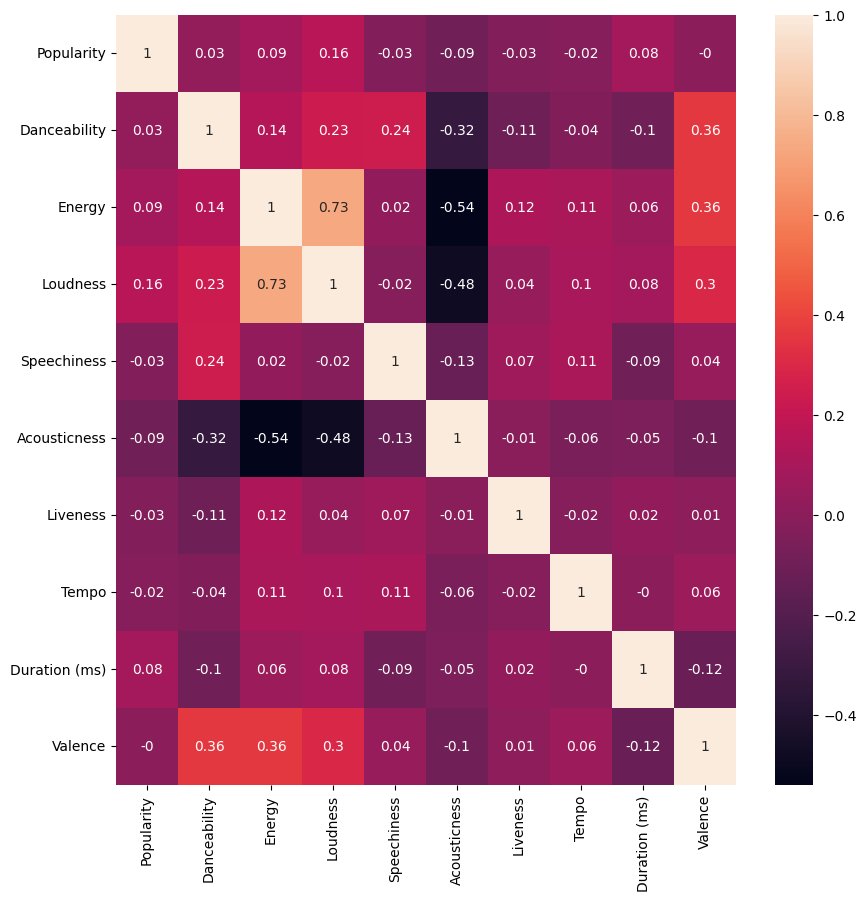

In [ ]:
plt.figure(figsize = (10,10))
correlation_matrix = spot_clean.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)

In [ ]:
rs = np.random.RandomState(0)
corr_1 = spot_clean.corr()
filter_corr = corr_1[(corr_1 >= 0.1) | (corr_1 <= -0.1)]
filter_corr.style.background_gradient(cmap = 'plasma')

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
Popularity,1.000000,nan,nan,0.158767,nan,nan,nan,nan,nan,nan
Danceability,nan,1.000000,0.142130,0.234928,0.237394,-0.316798,-0.114518,nan,-0.101390,0.361627
Energy,nan,0.142130,1.000000,0.732616,nan,-0.542399,0.124693,0.113352,nan,0.356325
Loudness,0.158767,0.234928,0.732616,1.000000,nan,-0.477431,nan,0.104371,nan,0.298762
Speechiness,nan,0.237394,nan,nan,1.000000,-0.131436,nan,0.111255,nan,nan
Acousticness,nan,-0.316798,-0.542399,-0.477431,-0.131436,1.000000,nan,nan,nan,nan
Liveness,nan,-0.114518,0.124693,nan,nan,nan,1.000000,nan,nan,nan
Tempo,nan,nan,0.113352,0.104371,0.111255,nan,nan,1.000000,nan,nan
Duration (ms),nan,-0.101390,nan,nan,nan,nan,nan,nan,1.000000,-0.119981
Valence,nan,0.361627,0.356325,0.298762,nan,nan,nan,nan,-0.119981,1.000000


<Axes: >

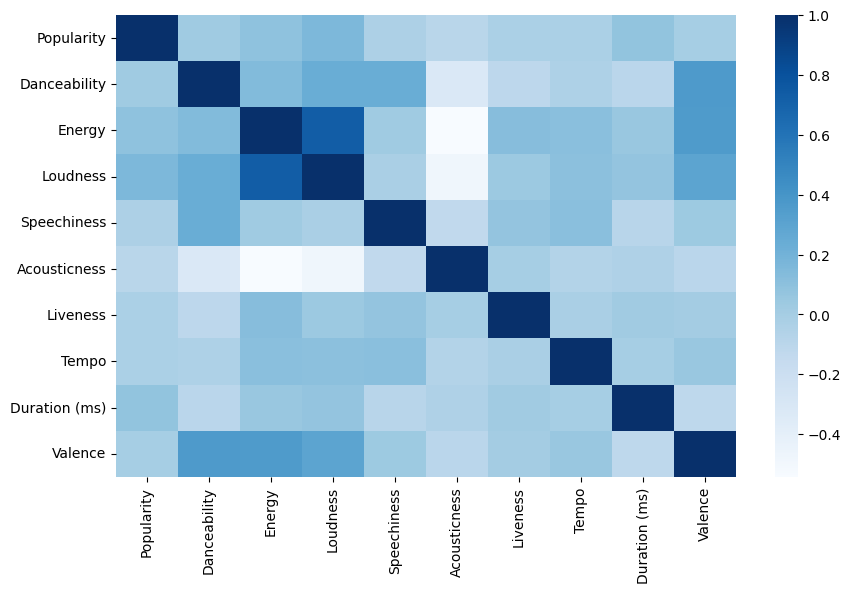

In [ ]:
corr_2 = spot_clean.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_2, cmap = 'Blues', annot = False)

## tree time (inspired by Module 4 lecture 1b)

### using popularity as target

#### decision tree regression

In [ ]:
X = spot_clean.drop('Popularity', axis = 1)
y = spot_clean['Popularity']

In [ ]:
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 5) # arbitrarily chose max_depth = 3
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 16810.0


In [ ]:
#CV RMSE: 16140.0 ------ numLoops = 50, max_depth = 3
#CV RMSE: 16560.0 ------ numLoops = 50, max_depth = 5
#CV RMSE: 16530.0 ------ numLoops = 100, max_depth = 3
#CV RMSE: 16160.0 ------ numLoops = 500, max_depth = 3
#CV RMSE: 16860.0 ------ numLoops = 500, max_depth = 5

#### choosing tree depth

In [ ]:
max_depths = [1,2,3,4,5]

rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 50

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)
  for idx in range(0, numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std(ddof = 1)

In [ ]:
pd.DataFrame(zip(max_depths, rms_depth, std_depth))

,0,1,2
0,1,15.246065,1.272764
1,2,15.754224,1.237662
2,3,16.619573,1.165899
3,4,16.511184,1.586298
4,5,17.027820,1.390677


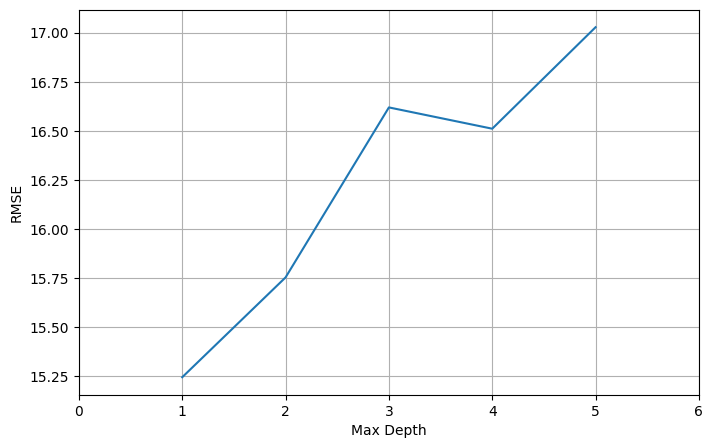

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0,6)
plt.grid()

In [ ]:
# re-running wtih max_depth = 1
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 15610.0


In [ ]:
# CV RMSPE
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f'CV RMSPE: {rms_error.mean().round(2)}')

CV RMSPE: inf


### using loudness as target

#### decision tree regression

In [ ]:
X = spot_clean.drop('Loudness', axis = 1)
y = spot_clean['Loudness']

In [ ]:
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 5) # arbitrarily chose max_depth = 3
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 1740.0


#### choosing tree depth

In [ ]:
max_depths = [1,2,3,4,5]

rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 50

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)
  for idx in range(0, numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std(ddof = 1)

In [ ]:
pd.DataFrame(zip(max_depths, rms_depth, std_depth))

,0,1,2
0,1,2.103846,0.130897
1,2,1.811353,0.086537
2,3,1.718417,0.096976
3,4,1.725066,0.099167
4,5,1.768007,0.144244


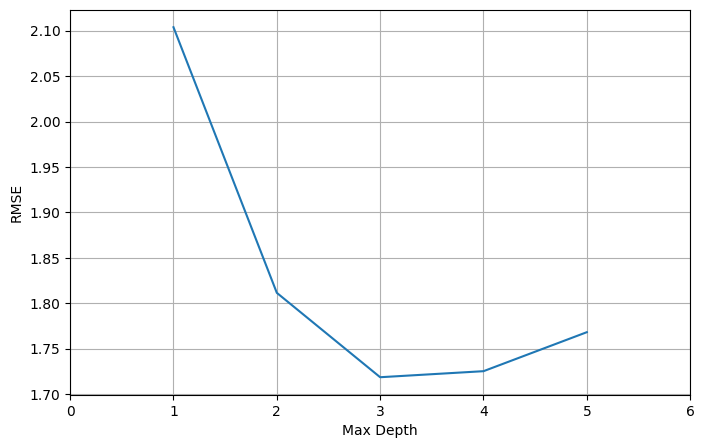

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0,6)
plt.grid()

In [ ]:
# re-running wtih max_depth = 4
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 2120.0


In [ ]:
# CV RMSPE
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f'CV RMSPE: {rms_error.mean().round(2)}')

CV RMSPE: 49.62


### using energy as target

#### decision tree regression

In [ ]:
X = spot_clean.drop('Energy', axis = 1)
y = spot_clean['Energy']

In [ ]:
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 5) # arbitrarily chose max_depth = 3
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 110.0


#### choosing tree depth

In [ ]:
max_depths = [1,2,3,4,5]

rms_depth = np.zeros(len(max_depths))
std_depth = np.zeros(len(max_depths))

numLoops = 50

for n, depth in enumerate(max_depths):
  rms_error = np.zeros(numLoops)
  for idx in range(0, numLoops):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
  rms_depth[n] = rms_error.mean()
  std_depth[n] = rms_error.std(ddof = 1)

In [ ]:
pd.DataFrame(zip(max_depths, rms_depth, std_depth))

,0,1,2
0,1,0.134042,0.005200
1,2,0.116198,0.004213
2,3,0.109552,0.004519
3,4,0.107822,0.004027
4,5,0.108739,0.004792


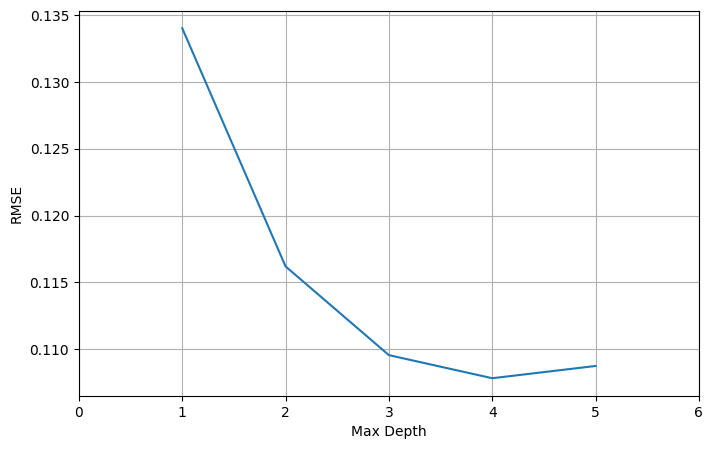

In [ ]:
plt.figure(figsize = (8,5))
plt.plot(max_depths, rms_depth)
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.xlim(0,6)
plt.grid()

In [ ]:
# re-running wtih max_depth = 4
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1) # arbitrarily chose max_depth = 3
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'CV RMSE: {rms_error.mean().round(2)*1000}')

CV RMSE: 130.0


In [ ]:
# CV RMSPE
numLoops = 500
rms_error = np.zeros(numLoops)

for idx in range(0, numLoops):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
  model = DecisionTreeRegressor(max_depth = 1) # arbitrarily chose max_depth = 3
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rms_error[idx] = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
print(f'CV RMSPE: {rms_error.mean().round(2)}')

CV RMSPE: 44.78
